# Imports

In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib_inline

# Check current directory

In [2]:
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: c:\HoGent\Jaar2\ML\Project\MachineLearningProject_Solar\script


# Load CSV files

In [3]:
# Load CSV files
csv1 = pd.read_csv('https://raw.githubusercontent.com/HOGENT-ML/course/main/datasets/solar.csv')
csv2 = pd.read_csv('https://raw.githubusercontent.com/HOGENT-ML/course/main/datasets/weather.csv') 

# Load Excel file
xlsx = pd.read_excel('../data/sunrise-sunset.xlsx')


In [4]:
# # Load CSV files
# csv1 = pd.read_csv('./course/datasets/solar.csv')
# csv2 = pd.read_csv('./course/datasets/weather.csv')

# # Load Excel file
# xlsx = pd.read_excel('./course/datasets/sunrise-sunset.xlsx')


# Convert CLSX to CSV file

In [5]:
# convert xlsx to csv
xlsx.to_csv('../data/sunrise-sunset.csv', index=False)


# Load converted CSV file

In [6]:
# Load the new csv file
csv3 = pd.read_csv('../data/sunrise-sunset.csv')

# Create dataframes

In [7]:
#create dataframes
df_solar = pd.DataFrame(csv1)
df_weather = pd.DataFrame(csv2)
df_sunrise_sunset = pd.DataFrame(csv3)

# Convert timestamp to datetime from solar.csv

In [8]:
def convert_date(df_solar):
  date_format = "%Y-%m-%d %H:%M:%S"
  string = str(df_solar)[:16] + ":00"
  new = datetime.strptime(string,date_format)
  return new

# Convert timestamp to datetime 

In [9]:
df_solar['timestamp'] = df_solar['timestamp'].apply(convert_date)
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])
df_sunrise_sunset['datum'] = pd.to_datetime(df_sunrise_sunset['datum'])

# Merge solar and weather csv on timestamp

In [10]:
# Merge the csv files 
df_merged = pd.merge_asof(df_solar,df_weather,on="timestamp",direction="nearest")

# Save the merged dataframe to a new csv file

In [11]:
df_merged.to_csv('../data/merged.csv', index=False)

# Load the merged dataframe

In [12]:
merged = pd.read_csv('../data/merged.csv')

# Convert timestamp to datetime

In [13]:
merged['timestamp'] = pd.to_datetime(merged['timestamp'])
merged['timestamp'] = merged['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Split the timestamp into date and time

In [14]:
merged['date'] = merged['timestamp'].apply(lambda x: x.split(' ')[0])
print(merged['date'])
merged['time'] = merged['timestamp'].apply(lambda x: x.split(' ')[1])
print(merged['time'])

0       2023-03-11
1       2023-03-11
2       2023-03-11
3       2023-03-11
4       2023-03-11
           ...    
7902    2024-02-04
7903    2024-02-04
7904    2024-02-04
7905    2024-02-04
7906    2024-02-04
Name: date, Length: 7907, dtype: object
0       16:00:00
1       17:00:00
2       18:00:00
3       19:00:00
4       20:00:00
          ...   
7902    07:00:00
7903    08:00:00
7904    09:00:00
7905    10:00:00
7906    11:00:00
Name: time, Length: 7907, dtype: object


## Column time formatted as HH:MM

In [15]:
merged['time'] = merged['time'].apply(lambda x: x[:5])
print(merged['time'])

0       16:00
1       17:00
2       18:00
3       19:00
4       20:00
        ...  
7902    07:00
7903    08:00
7904    09:00
7905    10:00
7906    11:00
Name: time, Length: 7907, dtype: object


# Save the new dataframe 

In [16]:
merged.to_csv('../data/merged.csv', index=False)

# Load the new dataframe

In [17]:
merged = pd.read_csv('../data/merged.csv')

# Convert date column to datetime

In [18]:
merged['date'] = pd.to_datetime(merged['date'])

## Check the data type of the date column and the datum column in the solar dataframe

In [19]:
print(merged['date'].dtype)
print(df_sunrise_sunset['datum'].dtype)

datetime64[ns]
datetime64[ns]


# Merge the solar and weather dataframes on date

In [20]:
df_merged = pd.merge(merged,df_sunrise_sunset,left_on="date",right_on="datum",how="left")

# Save the merged dataframe into the merged.csv file

In [21]:
df_merged.to_csv('../data/merged.csv', index=False)

In [22]:
df_merged.head()

,timestamp,kwh,FID,the_geom,code,precip_quantity,precip_range,temp,temp_min,temp_max,...,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness,date,time,datum,Opkomst,Op ware middag,Ondergang
0,2023-03-11 16:00:00,0.54,synop_data.6407.2023-03-11 16:00:00+00,POINT (51.200341 2.887306),6407,NaN,NaN,5.8,NaN,NaN,...,1010.9,NaN,NaN,7.0,2023-03-11,16:00,2023-03-11,07:06:00,12:53:00,18:40:00
1,2023-03-11 17:00:00,1.02,synop_data.6434.2023-03-11 17:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,6.1,NaN,NaN,...,1009.7,NaN,NaN,NaN,2023-03-11,17:00,2023-03-11,07:06:00,12:53:00,18:40:00
2,2023-03-11 18:00:00,1.17,synop_data.6418.2023-03-11 18:00:00+00,POINT (51.347375 3.201846),6418,0.0,2.0,5.4,NaN,7.7,...,1010.2,NaN,NaN,NaN,2023-03-11,18:00,2023-03-11,07:06:00,12:53:00,18:40:00
3,2023-03-11 19:00:00,1.18,synop_data.6434.2023-03-11 19:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,3.7,NaN,NaN,...,1010.1,NaN,NaN,NaN,2023-03-11,19:00,2023-03-11,07:06:00,12:53:00,18:40:00
4,2023-03-11 20:00:00,1.18,synop_data.6418.2023-03-11 20:00:00+00,POINT (51.347375 3.201846),6418,NaN,NaN,5.3,NaN,NaN,...,1010.0,NaN,NaN,NaN,2023-03-11,20:00,2023-03-11,07:06:00,12:53:00,18:40:00


# add new column for the generation of solar power in kWh/h 

In [23]:
df_merged['kwh_per_hour'] = df_merged['kwh'].diff()


# Line plot of the generation of solar power in kWh/h of the 6th of July 2023

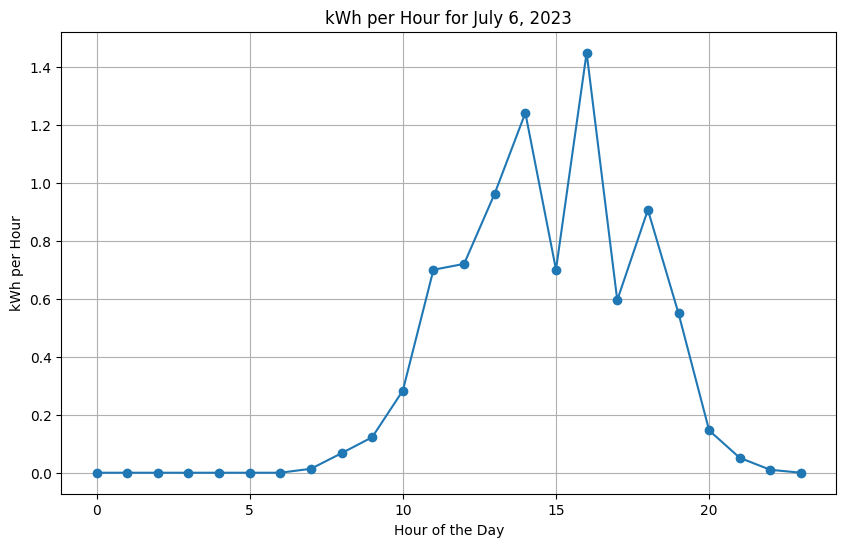

In [24]:
# Convert timestamps to datetime objects if needed
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

# Filter data for July 6, 2023
july_6_data = df_merged[df_merged['timestamp'].dt.date == pd.to_datetime('2023-07-06').date()]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(july_6_data['timestamp'].dt.hour, july_6_data['kwh_per_hour'], marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('kWh per Hour')
plt.title('kWh per Hour for July 6, 2023')
plt.grid(True)
plt.show()

In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 7906
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    7907 non-null   datetime64[ns]
 1   kwh                          7907 non-null   float64       
 2   FID                          7907 non-null   object        
 3   the_geom                     7907 non-null   object        
 4   code                         7907 non-null   int64         
 5   precip_quantity              1485 non-null   float64       
 6   precip_range                 1503 non-null   float64       
 7   temp                         7907 non-null   float64       
 8   temp_min                     313 non-null    float64       
 9   temp_max                     313 non-null    float64       
 10  temp_grass_min               296 non-null    float64       
 11  wind_speed                   7906 non-null 

In [26]:
df_merged.head()

,timestamp,kwh,FID,the_geom,code,precip_quantity,precip_range,temp,temp_min,temp_max,...,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness,date,time,datum,Opkomst,Op ware middag,Ondergang,kwh_per_hour
0,2023-03-11 16:00:00,0.54,synop_data.6407.2023-03-11 16:00:00+00,POINT (51.200341 2.887306),6407,NaN,NaN,5.8,NaN,NaN,...,NaN,NaN,7.0,2023-03-11,16:00,2023-03-11,07:06:00,12:53:00,18:40:00,NaN
1,2023-03-11 17:00:00,1.02,synop_data.6434.2023-03-11 17:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,6.1,NaN,NaN,...,NaN,NaN,NaN,2023-03-11,17:00,2023-03-11,07:06:00,12:53:00,18:40:00,0.48
2,2023-03-11 18:00:00,1.17,synop_data.6418.2023-03-11 18:00:00+00,POINT (51.347375 3.201846),6418,0.0,2.0,5.4,NaN,7.7,...,NaN,NaN,NaN,2023-03-11,18:00,2023-03-11,07:06:00,12:53:00,18:40:00,0.15
3,2023-03-11 19:00:00,1.18,synop_data.6434.2023-03-11 19:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,3.7,NaN,NaN,...,NaN,NaN,NaN,2023-03-11,19:00,2023-03-11,07:06:00,12:53:00,18:40:00,0.01
4,2023-03-11 20:00:00,1.18,synop_data.6418.2023-03-11 20:00:00+00,POINT (51.347375 3.201846),6418,NaN,NaN,5.3,NaN,NaN,...,NaN,NaN,NaN,2023-03-11,20:00,2023-03-11,07:06:00,12:53:00,18:40:00,0.00


# Line plot of the temperature over the 6th of July 2023

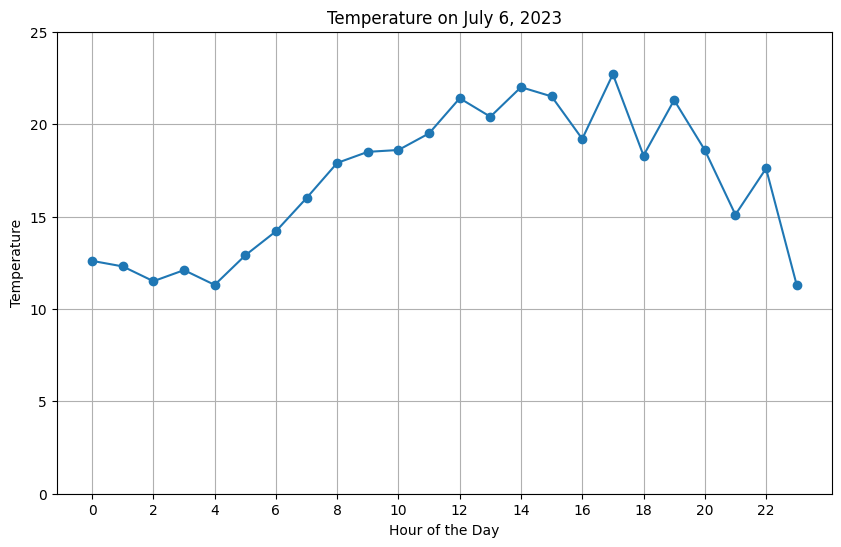

In [27]:
# Convert timestamps to datetime objects if needed
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

# Filter data for July 6, 2023
july_6_data = df_merged[df_merged['timestamp'].dt.date == pd.to_datetime('2023-07-06').date()]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(july_6_data['timestamp'].dt.hour, july_6_data['temp'], marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.xticks(range(0, 24,2))
plt.ylabel('Temperature')
plt.yticks(range(0, 30,5))
plt.title('Temperature on July 6, 2023')
plt.grid(True)
plt.show()


# Cleaning the data

In [28]:
df_merged.head()

,timestamp,kwh,FID,the_geom,code,precip_quantity,precip_range,temp,temp_min,temp_max,...,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness,date,time,datum,Opkomst,Op ware middag,Ondergang,kwh_per_hour
0,2023-03-11 16:00:00,0.54,synop_data.6407.2023-03-11 16:00:00+00,POINT (51.200341 2.887306),6407,NaN,NaN,5.8,NaN,NaN,...,NaN,NaN,7.0,2023-03-11,16:00,2023-03-11,07:06:00,12:53:00,18:40:00,NaN
1,2023-03-11 17:00:00,1.02,synop_data.6434.2023-03-11 17:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,6.1,NaN,NaN,...,NaN,NaN,NaN,2023-03-11,17:00,2023-03-11,07:06:00,12:53:00,18:40:00,0.48
2,2023-03-11 18:00:00,1.17,synop_data.6418.2023-03-11 18:00:00+00,POINT (51.347375 3.201846),6418,0.0,2.0,5.4,NaN,7.7,...,NaN,NaN,NaN,2023-03-11,18:00,2023-03-11,07:06:00,12:53:00,18:40:00,0.15
3,2023-03-11 19:00:00,1.18,synop_data.6434.2023-03-11 19:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,3.7,NaN,NaN,...,NaN,NaN,NaN,2023-03-11,19:00,2023-03-11,07:06:00,12:53:00,18:40:00,0.01
4,2023-03-11 20:00:00,1.18,synop_data.6418.2023-03-11 20:00:00+00,POINT (51.347375 3.201846),6418,NaN,NaN,5.3,NaN,NaN,...,NaN,NaN,NaN,2023-03-11,20:00,2023-03-11,07:06:00,12:53:00,18:40:00,0.00


# Drop the columns that are not needed

In [29]:
# Convert timestamps to datetime objects if needed
def convert_date(df_merged):
  date_format = "%H:%M:%S"
  string = str(df_merged)
  new = datetime.strptime(string,date_format)
  return new

df_merged['Ondergang'] = df_merged['Ondergang'].apply(convert_date)
df_merged['Ondergang'].head()




0   1900-01-01 18:40:00
1   1900-01-01 18:40:00
2   1900-01-01 18:40:00
3   1900-01-01 18:40:00
4   1900-01-01 18:40:00
Name: Ondergang, dtype: datetime64[ns]

In [30]:
df_merged.to_csv('../data/final.csv', index=False)

# Load the merged dataframe

In [31]:
df = pd.read_csv('../data/final.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timestamp                    7907 non-null   object 
 1   kwh                          7907 non-null   float64
 2   FID                          7907 non-null   object 
 3   the_geom                     7907 non-null   object 
 4   code                         7907 non-null   int64  
 5   precip_quantity              1485 non-null   float64
 6   precip_range                 1503 non-null   float64
 7   temp                         7907 non-null   float64
 8   temp_min                     313 non-null    float64
 9   temp_max                     313 non-null    float64
 10  temp_grass_min               296 non-null    float64
 11  wind_speed                   7906 non-null   float64
 12  wind_speed_unit              7907 non-null   int64  
 13  wind_direction    

In [33]:
df.drop("temp_min", axis=1, inplace=True)
df.drop("temp_max", axis=1, inplace=True)
df.drop("temp_grass_min", axis=1, inplace=True)
df.drop("weather_current", axis=1, inplace=True)
df.drop("short_wave_from_sky_24hours", axis=1, inplace=True)
df.drop("sun_duration_24hours", axis=1, inplace=True)

In [34]:
df.head()

,timestamp,kwh,FID,the_geom,code,precip_quantity,precip_range,temp,wind_speed,wind_speed_unit,...,pressure,pressure_station_level,cloudiness,date,time,datum,Opkomst,Op ware middag,Ondergang,kwh_per_hour
0,2023-03-11 16:00:00,0.54,synop_data.6407.2023-03-11 16:00:00+00,POINT (51.200341 2.887306),6407,NaN,NaN,5.8,2.000,1,...,1011.5,1010.9,7.0,2023-03-11,16:00,2023-03-11,07:06:00,12:53:00,1900-01-01 18:40:00,NaN
1,2023-03-11 17:00:00,1.02,synop_data.6434.2023-03-11 17:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,6.1,1.110,1,...,1011.7,1009.7,NaN,2023-03-11,17:00,2023-03-11,07:06:00,12:53:00,1900-01-01 18:40:00,0.48
2,2023-03-11 18:00:00,1.17,synop_data.6418.2023-03-11 18:00:00+00,POINT (51.347375 3.201846),6418,0.0,2.0,5.4,3.144,1,...,1011.9,1010.2,NaN,2023-03-11,18:00,2023-03-11,07:06:00,12:53:00,1900-01-01 18:40:00,0.15
3,2023-03-11 19:00:00,1.18,synop_data.6434.2023-03-11 19:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,3.7,1.442,1,...,1012.2,1010.1,NaN,2023-03-11,19:00,2023-03-11,07:06:00,12:53:00,1900-01-01 18:40:00,0.01
4,2023-03-11 20:00:00,1.18,synop_data.6418.2023-03-11 20:00:00+00,POINT (51.347375 3.201846),6418,NaN,NaN,5.3,3.355,1,...,1011.7,1010.0,NaN,2023-03-11,20:00,2023-03-11,07:06:00,12:53:00,1900-01-01 18:40:00,0.00


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               7907 non-null   object 
 1   kwh                     7907 non-null   float64
 2   FID                     7907 non-null   object 
 3   the_geom                7907 non-null   object 
 4   code                    7907 non-null   int64  
 5   precip_quantity         1485 non-null   float64
 6   precip_range            1503 non-null   float64
 7   temp                    7907 non-null   float64
 8   wind_speed              7906 non-null   float64
 9   wind_speed_unit         7907 non-null   int64  
 10  wind_direction          7784 non-null   float64
 11  wind_peak_speed         7905 non-null   float64
 12  humidity_relative       6320 non-null   float64
 13  pressure                7906 non-null   float64
 14  pressure_station_level  7907 non-null   

In [36]:
df.to_csv('../data/final.csv', index=False)